# Multilevel Monte Carlo Path Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
# Add the path to the mlmc module to the python path
sys.path.append("../src")
from mlmc import MLMCEuropean, sde_path, call_payoff, black_scholes_call_price

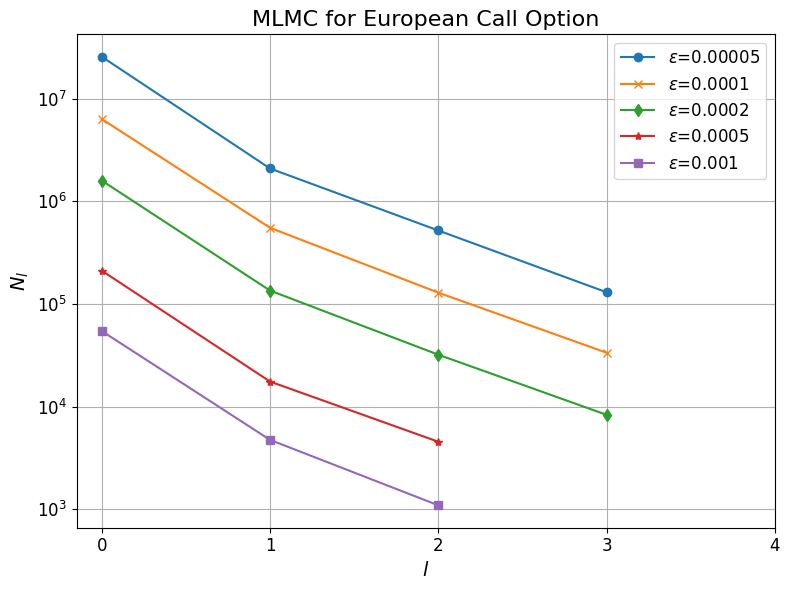

In [21]:
r = 0.05
sigma = 0.2
s0 = 1.0
K = 1.0
T = 1.0

# MLMC parameters
L = 4
N = 10_000
M = 4

# As in the paper
Eps = [0.00005, 0.0001, 0.0002, 0.0005, 0.001]

# For reproducibility
rng = np.random.default_rng(seed=42)

markers = ["o", "x", "d", "*", "s"]
# plt.figure(figsize=(4, 5))
plt.figure(figsize=(8, 6))
plt.title("MLMC for European Call Option", fontsize=16)

for i, eps in enumerate(Eps):
    mlmc_european = MLMCEuropean(eps, L, M, T, rng)
    estimator, N, maxL = mlmc_european.estimate_call_adaptative(s0, r, sigma, K)

    # print(f"N: {N}")
    # print(f"Estimator: {np.sum(estimator["means"])}")
    # print(f"Variance: {np.sum(estimator["vars"])}")
    # print()
    levels = np.arange(maxL + 1)
    eps = f"{eps:.5f}".rstrip('0')
    plt.plot(levels, N[: maxL + 1], label=rf"$\epsilon$={eps}", marker=markers[i])


plt.yscale("log")

plt.xlabel("$l$", fontsize=14)
plt.ylabel("$N_l$", fontsize=14)
plt.xticks(ticks=np.arange(L + 1), labels=np.arange(L + 1), fontsize=12)
plt.yticks(fontsize=12)

plt.minorticks_off()
plt.grid(which="major")
plt.legend(fontsize=12, loc="best")
plt.tight_layout()
plt.show()